In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import random as rd

###### 1a)

In [68]:
def MCMC(log_Posterior,data,initial,step_cov,n_iteration):
    param1=np.array(initial)
    sample=np.array(initial)
    for j in range(n_iteration):
        log_Posterior_i=log_Posterior(data,param1)
        #update the location
        param2=np.random.multivariate_normal(param1,step_cov)
        #find new posterior
        log_Posterior_f=log_Posterior(data,param2)
        # generate a random number between 0 and 1
        rand=np.random.rand()
        if log_Posterior_f-log_Posterior_i>np.log(rand):
            sample=np.vstack((sample,param2))
            param1=param2[:]
        else:
            sample=np.vstack((sample,param1))
    return(sample)

In [69]:
data = pd.read_csv('tweet_counts.csv')
data.head()

,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0


In [70]:
k=data['count'].values
w=data['week'].values

In [71]:
Poisson=lambda k,λ : (λ**k)/np.math.factorial(k)*np.exp(-λ)

In [74]:
α=1/np.mean(k)

In [75]:
def log_posterior(data,param):
    k,w=data
    lamb1,lamb2,W_s=param
    
    P=0
    
    for i in k[w<W_s]:
        P=P+np.log(Poisson(i,lamb1)*α*np.exp(-α*lamb1))

    for j in k[w>=W_s]:
        P=P+np.log(Poisson(j,lamb2)*α*np.exp(-α*lamb2))
        
    return(P)

In [111]:
D=MCMC(log_posterior,data=[k,w],initial=[20,20,20],step_cov=[[0.25,0,0],[0,0.25,0],[0,0,0.5]],n_iteration=50000)

In [112]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize']=8,6

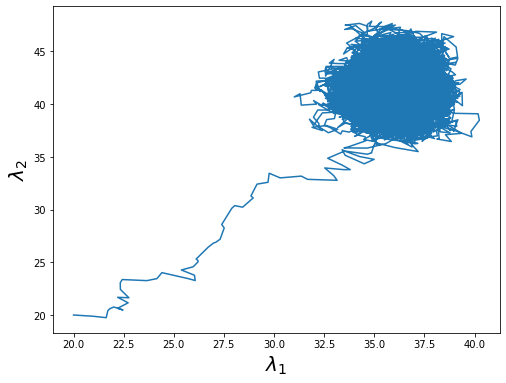

In [113]:
plt.plot(D.T[0],D.T[1])
plt.xlabel("$\lambda_1$",fontsize=20)
plt.xlabel("$\lambda_1$",fontsize=20)
plt.ylabel("$\lambda_2$",fontsize=20)

plt.show()

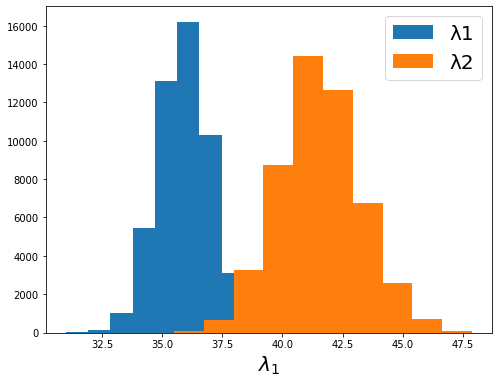

In [114]:
plt.hist(D.T[0][100:],label='λ1')
plt.hist(D.T[1][100:],label='λ2')
plt.xlabel("$\lambda_1$",fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [123]:
print('mean(λ1 is)',np.mean(D.T[0][100:]))
print('std(λ1 is)',np.std(D.T[0][100:]))

mean(λ1 is) 35.90727354273693
std(λ1 is) 1.0762841732807162


In [116]:
print('mean(λ2 is)',np.mean(D.T[1][100:]))
print('std(λ2 is)',np.std(D.T[1][100:]))

mean(λ2 is) 41.54839225782876
std(λ2 is) 1.6860809224695248


In [117]:
print('mean(W_s is)',np.round(np.mean(D.T[2][100:])))

mean(W_s is) 34.0


-Changing the initial value just allows for the algorithm to converge faster. This only saves around 100 points of computation so it is relatively negligible as long as this is accounted for in your mean and std calculations.

-Re-rerunning the code with only 10,000 iterations tend to produce different results with pretty significant differences in means and stds. When running the code with 50,000 iterations these variations are greatly reduced.

###### 1b)

-Overall the posteriors found for λ1 and λ2 and very similar to those found in HW#2 with only a couple tenths of difference between the means at most.

-However, the value for W_s is consistently different to what was found from in HW#2. HW#2 produced a W_s value of week 38 while in this method we get the most probable value of W_s to be week 34.

###### 1c)

In [130]:
P_five_weeks=0
for i in range(len(D.T[0][100:])):
        if (D.T[1][i+100]-D.T[0][i+100])>5:
            P_five_weeks+=1

In [132]:
Probability=P_five_weeks/len(D.T[0][100:])
print(Probability)

0.6336947155367628


-The probability of [λ2-λ1>5] that we computed here is 63%. This value is very similar to what was computed in HW#2 which helps to validate the two methods used.

###### 2a)

In [59]:
def kmeans(Clusters,data):
    #1.Start with input Cluster centers
    Clusters=Clusters
    a=len(X[:,0])
    Centroids=np.array([]).reshape(3,0)

    #2.initialize random clusters
    for i in range(Clusters):
        rand=rd.randint(0,a-1)
        Centroids=np.c_[Centroids,X[rand]]


    #3/4. Update Clusters with new optimal cluster point using Euclidean Distance until convergence
    iterations=100
    #100 iterations used as it produced good results for this example in short time. # of iterations could be added as function
    #input if desired
    Output={}
    for n in range(iterations):
        Distance=np.array([]).reshape(a,0)
        for i in range(Clusters):
            temp=np.sum((X-Centroids[:,i])**2,axis=1)
            Distance=np.c_[Distance,temp]

        B=np.argmin(Distance,axis=1)+1
        Y={}
        for i in range(Clusters):
            Y[i+1]=np.array([]).reshape(3,0)
        for i in range(a):
            Y[B[i]]=np.c_[Y[B[i]],X[i]]

        for i in range(Clusters):
            Y[i+1]=Y[i+1].T


        for i in range(Clusters):
            Centroids[:,i]=np.mean(Y[i+1],axis=0)

        Output=Y
        
    return Output, Centroids

###### 2b)

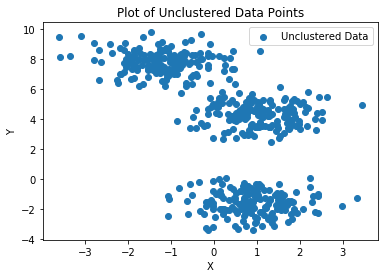

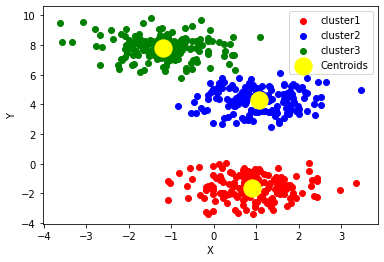

In [32]:
from sklearn.datasets import make_blobs
X, Y = make_blobs (n_samples=500, cluster_std=0.8, centers=3, n_features=3, random_state=0)

#plot of unclustered data
plt.scatter(X[:,0],X[:,1],label='Unclustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Plot of Unclustered Data Points')
plt.show()

#applying kmeans function created earlier to given data
Output,Centroids = kmeans(3,X)


#graphing output of centroids from kmeans function
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for i in range(3):
    plt.scatter(Output[i+1][:,0],Output[i+1][:,1],c=color[i],label=labels[i])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

###### 2c)

One popular method I found to find the optimum number of clusters in a k-means algorithm is using the Elbow Method.
The Elbow Method takes the within cluster sums of squares (wcss) for every cluster and sums them to find the total amount of "error" of the centroids to each point of the cluster. When the points of clusters are very tight around a centroid the wcss will be very small, however, if the points in a cluster are veryy spread out then the value for the wcss will be very large. The Elbow Method has its name from plotting the wcss value for a cluster value against the number of clusters used in the kmeans algortihm. The theory behind the Elbow Method is that with low number of clusters the wcss value will be very high, and as more clusters are added then wcss value should gradually decrease til there is a cluster for every point and the wcss value is 1. However, between the the 1 cluster state and the point where wcss is equal to 1 there is usually a locally optimal solution that can be found and that is your target value for k.  

###### 2d)

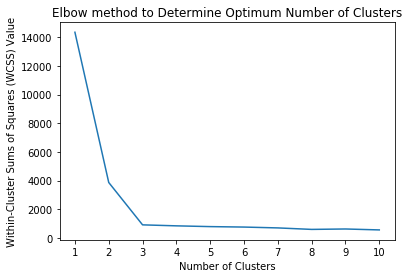

In [62]:
WCSS_array=np.array([])
#creating empty array to store values for each wcss value
for K in range(1,11):
    Output, Centroids = kmeans(K,X)
    #running each value for K(1-10)
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids.T[k,:])**2)
        #for each cluster summing the wcss value
    WCSS_array=np.append(WCSS_array,wcss)
    
#Plotting WCSS values vs Number of Clusters
plt.plot(range(1,11),WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sums of Squares (WCSS) Value')
plt.xticks(range(1,11))
plt.title('Elbow method to Determine Optimum Number of Clusters')
plt.show()

Evaluating the above graph using the Elbow Method decribed above, it is clear to see that a local minimum of the WCSS values occurs at k=3 clusters. Any less clusters will produce huge deviations from the centroids to each point, and any more clusters will just be an overfitting of the data without gaining much more information.